# Full directory

In [14]:
import cv2
import numpy as np
import numpy
import matplotlib.pyplot as plt
import re
import os
import sys

In [5]:
img2 = cv2.imread( '/home/sameer/Spyder/images/Images/20.jpg' , cv2.IMREAD_UNCHANGED)

In [0]:
#equ = cv2.equalizeHist(forth_channel)

In [6]:
print(equ.shape)
vals = equ.mean(axis=1).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 10)
plt.xlim([0,30])
plt.show()

NameError: name 'equ' is not defined

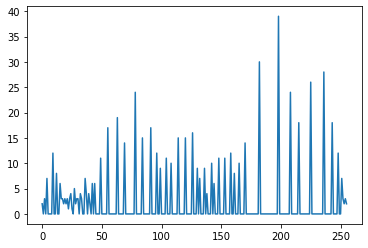

In [0]:
histr = cv2.calcHist([equ],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histr) 
plt.show() 

In [13]:
histr = cv2.calcHist([img2],[2],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histr) 
plt.show() 

error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/histogram.cpp:153: error: (-215:Assertion failed) j < nimages in function 'histPrepareImages'


In [14]:
cv2.__version__

'4.1.0'

# Loop over directory

In [15]:
def segment_mask(image, mask):
    contours,hierachy,=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


    img_ =  cv2.bitwise_and(image,image,mask = mask)
    height, width = image.shape
    min_area = 100;
    images = []
    count=0
    for c in contours:
        #cv2.drawContours(img2,c,-1,(255,255,0),3)
        area = cv2.contourArea(c)

        #to remove tiny hull
        if(area > min_area):
            print(area)
            hull = cv2.convexHull(c)
            x,y,w,h = cv2.boundingRect(hull)
            print(x,y,w,h)

            temp = np.zeros((height, width, 1))
            cv2.fillPoly(temp, np.int_([hull]), (255, 255, 255))

            cropped_out = img_[y:y+h, x:x+w]
            images.append(cropped_out)
    return(images)

In [16]:
def sort_contours(cnts, reverse = False):
    # initialize the reverse flag and sort index
    i = 0
    
    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))
 
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [17]:
def segment_mask_ordered(image, mask):
    contours,hierachy,=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    img_ =  cv2.bitwise_and(image,image,mask = mask)
    height, width = image.shape
    min_area = 100;
    images = []
    count= 0 
    cnts, _ = sort_contours(contours)
    img_count = 0
    count = 1
    for c in cnts:

        area = cv2.contourArea(c)

        #to remove tiny hull
        if(area > min_area):
            print(area)
            hull = cv2.convexHull(c)
            cv2.drawContours(image_copy,[hull],-1,(255,255,0),3)
            x,y,w,h = cv2.boundingRect(hull)
            print(x,y,w,h)
            # compute the center of the contour
            M = cv2.moments(hull)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])

            
            cv2.putText(image_copy, str(count), (cX,cY),cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 4)
            
            count = count+1;
            temp = np.zeros((height, width, 1)).astype('uint8')
            cv2.fillPoly(temp, np.int_([hull]), (255, 255, 255))
            #cropped_out = img_[y:y+h, x:x+w]
            #print(temp.shape)
            
            
            cropped_out = cv2.bitwise_and(image,image,mask = temp)
            #print(cropped_out)
            #eq = cv2.equalizeHist(cropped_out)
            images.append(cropped_out)

            
    return(images, count)

In [27]:
#save in test folder 
pathname1 = '/home/sameer/Spyder/images/test/Images/'
pathname2 = '/home/sameer/Spyder/images/test/Masks/'
output_path = '/home/sameer/Spyder/images/test/Panels_green/'
matches = 0 
count = 0
for_loop_count = 0 
for item1 in os.listdir(pathname1):    
    for item2 in os.listdir(pathname2):
        
        if (item1 == item2):
            path1 = os.path.join(pathname1,item1)
            path2 = os.path.join(pathname2,item2)
            #read image 1 and 2
            count = count +1
            
            #read image 1 and 2
            image = cv2.imread(path1,0)
            image2 = cv2.imread(path1)
            mask = cv2.imread(path2,0)
            
            #print(count)
            
            #print("Image shape",image.shape)
            #print("Mask shape",mask.shape)
            
            
            #item1 = re.sub("\.", "", item1)
            
            #step 1
            image_copy = image.copy()
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            image_copy = clahe.apply(image_copy)
            #step2
            images, num = segment_mask_ordered(image, mask)
            
            #new image mask 
            img_3c =  cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
            new_img = np.zeros_like(img_3c)
            panels_img = []
            #for loop to loop over array of images 
            for i in range (0,len(images)):
                
             
                #step3

                equalize1 = images[i]
                equalize1 = equalize1[:,:,np.newaxis]
                equalize1 = np.tile(equalize1,(1,1,3))
                #print(equalize1.shape)
                #fig, ax = plt.subplots(figsize = (20,10))
    
                #ax.imshow(images[0])
        
        
                #step3.5
            

                im_copy = images[i].copy()
                image_copy = image.copy()

                #Sharpen
                kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
                kernel_sobel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

                im = cv2.filter2D(im_copy, -1, kernel)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.set_title("shapen")
                #ax.imshow(im)

                #combined shapen and original extracted
                image_combined = cv2.addWeighted(im_copy, 0.5, im, 0.5, 0)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.set_title("shapen combined with original extracted")
                #ax.imshow(image_combined)

                im_sobel = cv2.filter2D(im_copy, -1, kernel_sobel)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.set_title("Sobel-self")
                #ax.imshow(im_sobel)

                kernel_dilate_2 = np.ones((3,3),np.uint8)
                dilation = cv2.dilate(im,kernel_dilate_2,iterations = 1)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.set_title("Dilation")
                #ax.imshow(dilation)

                kernel_erode_2 = np.ones((3,3),np.uint8)
                erosion = cv2.dilate(im,kernel_erode_2,iterations = 1)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.set_title("Erosion")
                #ax.imshow(erosion)
                
        
        
                #step 4


                scale = 1
                delta = 0
                ddepth = cv2.CV_16S  

                im = cv2.filter2D(images[i], -1, kernel)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(im)

                src = cv2.GaussianBlur(im, (3, 3), 0)

                # Gradient-x
                grad_x = cv2.Sobel(src, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(grad_x)

                # Gradient-Y
                # grad_y = cv.Scharr(gray,ddepth,0,1)
                grad_y = cv2.Sobel(src, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(grad_y)


                abs_grad_x = cv2.convertScaleAbs(grad_x)
                abs_grad_y = cv2.convertScaleAbs(grad_y)

                grad = cv2.addWeighted(abs_grad_x, 0.1, abs_grad_y, 0.5, 0)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(grad)
                
                
                #step 4.5 

                #Impose the binary mask on the original image
                gray = grad[:,:,np.newaxis]
                #cv2.imwrite("./test.png",gray)
                
                
                
                #step 5

                #Denoise gray
                denoised_gray = cv2.fastNlMeansDenoising(gray, None, 9, 5)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(denoised_gray)
                
                
                #step 6

                kernel_dilate_2 = np.ones((3,3),np.uint8)
                dilation = cv2.dilate(denoised_gray,kernel_dilate_2,iterations = 1)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(dilation)

                kernel_erode_2 = np.ones((3,3),np.uint8)
                erosion = cv2.erode(dilation,kernel_erode_2,iterations = 1)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(erosion)
                
                
                #step 7 
                #Threshold the image 
                ret, thresh = cv2.threshold(erosion,
                      15, 255, cv2.THRESH_BINARY+cv2.ADAPTIVE_THRESH_MEAN_C)
                #print(thresh.shape)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(thresh)

                kernel_opening = np.ones((3,3),np.uint8)
                opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel_opening)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(opening)



                th2 = cv2.adaptiveThreshold(erosion,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                            cv2.THRESH_BINARY,63,2)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(th2)

                th3 = cv2.adaptiveThreshold(erosion,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                            cv2.THRESH_BINARY,11,2)
                #fig, ax = plt.subplots(figsize = (40,10))
                #ax.imshow(th3)
                
                
                
                #step 8 

                #erosion to remove the connecting regsions between panels 

                kernel = np.ones((1,1),np.uint8)
                erosion_2 = cv2.erode(thresh,kernel,iterations = 1)
                
                
                #step 9 
                
                #canny for edges to be visible
                edges2= cv2.Canny(erosion_2,10,100)
                
                
                #step 10 
                contours_image = np.expand_dims(img_5, axis=-1)
                
                img_5 = edges2.copy()
                img_7 = images[i].copy()
                img_9 = cv2.cvtColor(img_7,cv2.COLOR_GRAY2RGB)
                contours,hierachy,=cv2.findContours(contours_image,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)




                count=0
                for c in contours:
                    peri = cv2.arcLength(c, True)
                    approx = cv2.approxPolyDP(c, 0.00001 * peri, True)
                    
                    #sent original image for plotting
                    
                    '''x,y,w,h = cv2.boundingRect(approx)
                    if (15 < w < 40   and 15 < h < 40):
                        cv2.rectangle(image2,(x, y), (x+w, y+h), (0, 255, 0), 2)
                        count+=1'''                        
                    #Use rotated rectangles 
                    rect = cv2.minAreaRect(approx)
                    w, h = rect[1]

                    if (5 < w < 40 and 5 < h < 40):
                        box = cv2.boxPoints(rect)
                        box = np.int0(box)
                        cv2.drawContours(image2,[box],0,(0,255,0),3)
                        
                #print(count)
                
                
            item1 = os.path.splitext(item1)[0]
            cv2.imwrite(output_path + item1  + '.jpg',image2)
            
                
                
                
                
               
                


33369.0
64 0 88 480
114.0
68 30 3 59
228.0
87 235 51 8
16752.5
232 0 88 233
18601.0
240 231 88 249
38176.0
408 0 104 480
101.5
418 390 4 36
11570.0
576 0 64 223
10813.0
592 224 48 256
14146.0
56 0 80 208
9533.5
96 344 88 136
15021.5
224 0 96 192
11025.5
272 336 96 144
14818.0
400 0 104 184
13037.5
448 320 104 160
4893.5
576 64 64 104
39651.5
16 0 128 480
37493.0
192 0 120 480
34670.0
360 0 112 480
14853.0
536 0 88 232
39175.5
64 0 96 480
267.0
78 262 57 7
260.0
145 71 6 127
41003.5
232 0 104 480
349.0
232 257 71 14
249.5
234 68 5 125
179.5
234 4 4 62
36026.0
416 0 88 480
2310.0
600 248 40 78
31608.0
8 0 88 480
36033.0
176 0 96 480
150.5
220 117 32 9
37289.5
352 0 96 480
167.0
365 115 39 8
39719.5
520 0 104 480
194.0
542 109 61 7
103.0
618 381 4 37
37375.5
0 0 96 480
300.5
6 216 69 8
39599.5
160 0 104 480
110.0
188 211 32 6
38463.5
336 0 104 480
199.5
363 206 63 5
34885.0
520 0 88 480
103.5
539 202 25 6
107.5
562 201 26 7
1325.0
0 400 24 80
37957.5
72 0 120 480
38169.5
248 0 112 480
106

21925.0
0 0 88 296
3165.0
16 432 88 48
22129.5
160 0 104 288
3702.0
184 424 88 56
20854.0
336 0 104 280
4488.0
360 416 88 64
19109.5
512 0 96 272
4721.5
536 400 80 80
8348.0
0 272 112 88
9033.5
0 80 112 96
129.0
4 170 45 5
166.0
6 274 44 5
33407.5
48 0 96 480
106.0
53 43 19 10
369.5
68 451 60 9
37904.0
224 0 104 480
121.5
237 31 27 11
228.0
246 448 79 5
155.0
277 26 26 11
37872.5
400 0 112 440
3038.5
424 440 88 40
153.5
440 19 34 9
18940.5
576 16 64 416
43075.0
72 0 104 480
138.0
99 290 49 5
40858.0
264 0 96 480
230.0
268 289 44 8
118.0
310 288 29 7
176.0
353 343 3 90
39617.0
456 0 96 480
199.0
458 182 4 69
148.0
516 286 31 10
165.0
529 287 22 50
31749.5
48 0 80 480
36274.0
216 0 96 480
104.0
237 212 25 6
116.0
260 211 28 6
37900.0
392 0 96 479
326.5
413 203 53 10
30667.5
560 0 80 480
41046.0
64 0 96 480
453.5
68 84 85 10
143.5
118 89 39 6
38848.5
272 0 95 480
151.0
361 5 4 77
36944.5
488 0 88 480
298.0
570 88 6 101
38873.5
80 0 120 480
38155.5
256 0 112 480
36235.0
432 0 104 480
15324

31595.5
24 32 88 448
151.0
26 70 4 53
114.5
59 429 39 5
31896.0
200 24 88 456
35862.5
368 16 96 464
252.0
382 422 62 6
36315.5
544 16 96 464
158.5
557 416 55 5
115.0
610 416 28 6
40839.0
64 0 104 480
175.5
66 232 27 19
222.0
91 231 41 8
39889.5
272 0 96 480
285.5
301 224 40 9
120.5
339 225 23 7
38004.5
480 0 96 480
136.0
489 322 6 65
566.0
491 220 81 10
31358.0
88 8 96 472
34435.5
250 0 110 480
102.5
318 386 28 5
36931.5
424 0 109 480
12479.0
592 0 48 368
13957.0
96 273 88 207
17750.5
96 0 80 278
35420.0
256 0 102 480
134.5
269 267 37 7
37601.0
424 0 104 480
14710.0
592 0 48 479
141.0
609 253 27 8
107.0
610 350 4 39
33968.5
72 0 88 480
34943.0
240 0 96 480
327.5
261 217 59 10
37836.0
408 0 104 480
20672.5
584 0 56 480
34139.0
120 0 112 480
37396.5
280 0 120 480
39629.0
456 0 120 480
4303.5
48 0 80 72
19617.0
80 208 96 272
3632.5
216 0 88 56
22282.5
256 192 104 288
2816.0
400 0 88 40
25732.0
432 184 112 296
40647.5
64 0 96 480
104.0
100 401 24 7
196.0
153 253 3 100
39268.0
240 0 96 480


42165.0
72 0 112 480
117.0
112 343 23 9
168.0
132 341 33 9
40088.5
256 0 104 480
107.0
258 134 4 39
156.5
268 339 32 9
119.5
307 336 28 8
38105.0
440 0 104 480
195.5
469 331 50 9
34511.5
32 0 104 480
187.0
57 311 26 10
326.5
82 309 42 12
38352.0
216 0 104 480
106.0
230 305 28 8
40304.5
392 0 112 480
24911.0
568 0 72 480
38760.5
0 0 120 480
112.0
93 353 18 14
39340.0
168 0 128 480
126.5
243 347 24 11
37524.5
352 0 128 480
114.0
377 337 19 14
34575.0
535 0 105 480
12550.5
0 120 48 360
26535.5
136 120 88 360
28892.0
312 112 88 368
30761.0
488 112 96 368
49414.0
0 0 144 480
59659.0
240 0 176 480
34917.5
104 0 97 480
134.5
114 348 26 18
102.5
136 359 22 7
38350.5
272 0 112 480
296.0
309 349 54 9
38594.0
448 0 112 480
165.5
500 341 33 8
38590.0
88 0 112 480
309.5
116 316 71 10
36918.0
256 0 112 480
438.0
285 305 59 15
35669.0
440 0 104 480
232.0
461 298 46 11
38026.5
96 0 104 480
37362.0
264 0 104 480
35580.5
440 0 96 480
323.5
451 169 45 11
111.0
490 173 33 5
106.0
494 169 29 5
9278.5
0 312

# Improvise counting( remove big boxes)

In [28]:
image = cv2.imread('/home/sameer/Spyder/images/test/Images/36.jpg',0)
image2 = cv2.imread('/home/sameer/Spyder/images/test/Images/36.jpg')
mask = cv2.imread('/home/sameer/Spyder/images/test/Masks/36.jpg',0)

#print(count)

#print("Image shape",image.shape)
#print("Mask shape",mask.shape)


#item1 = re.sub("\.", "", item1)

#step 1
image_copy = image.copy()
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image_copy = clahe.apply(image_copy)
#step2
images, num = segment_mask_ordered(image, mask)

#new image mask 
img_3c =  cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
new_img = np.zeros_like(img_3c)
panels_img = []


7418.0
48 88 104 88
85985.0
272 416 1136 96
87793.0
280 251 1128 93
92993.5
280 80 1128 96
340.5
462 497 100 5
52702.0
632 592 768 88
123.0
636 427 8 25
167.0
638 452 7 41
234.0
917 594 61 5
185.0
1110 338 64 5
562.5
1213 170 190 5


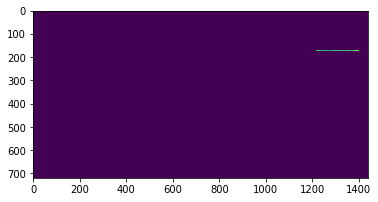

In [36]:
plt.imshow(images[10])

In [31]:
len(images)

11

In [0]:
#for loop 

#for loop to loop over array of images 
for i in range (0,len(images)):
    
 
    #step3

    equalize1 = images[i]
    equalize1 = equalize1[:,:,np.newaxis]
    equalize1 = np.tile(equalize1,(1,1,3))
    #print(equalize1.shape)
    #fig, ax = plt.subplots(figsize = (20,10))

    #ax.imshow(images[0])


    #step3.5


    im_copy = images[i].copy()
    image_copy = image.copy()

    #Sharpen
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    kernel_sobel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

    im = cv2.filter2D(im_copy, -1, kernel)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.set_title("shapen")
    #ax.imshow(im)

    #combined shapen and original extracted
    image_combined = cv2.addWeighted(im_copy, 0.5, im, 0.5, 0)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.set_title("shapen combined with original extracted")
    #ax.imshow(image_combined)

    im_sobel = cv2.filter2D(im_copy, -1, kernel_sobel)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.set_title("Sobel-self")
    #ax.imshow(im_sobel)

    kernel_dilate_2 = np.ones((3,3),np.uint8)
    dilation = cv2.dilate(im,kernel_dilate_2,iterations = 1)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.set_title("Dilation")
    #ax.imshow(dilation)

    kernel_erode_2 = np.ones((3,3),np.uint8)
    erosion = cv2.dilate(im,kernel_erode_2,iterations = 1)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.set_title("Erosion")
    #ax.imshow(erosion)
    


    #step 4


    scale = 1
    delta = 0
    ddepth = cv2.CV_16S  

    im = cv2.filter2D(images[i], -1, kernel)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(im)

    src = cv2.GaussianBlur(im, (3, 3), 0)

    # Gradient-x
    grad_x = cv2.Sobel(src, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(grad_x)

    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_y = cv2.Sobel(src, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(grad_y)


    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    grad = cv2.addWeighted(abs_grad_x, 0.1, abs_grad_y, 0.5, 0)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(grad)
    
    
    #step 4.5 

    #Impose the binary mask on the original image
    gray = grad[:,:,np.newaxis]
    #cv2.imwrite("./test.png",gray)
    
    
    
    #step 5

    #Denoise gray
    denoised_gray = cv2.fastNlMeansDenoising(gray, None, 9, 5)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(denoised_gray)
    
    
    #step 6

    kernel_dilate_2 = np.ones((3,3),np.uint8)
    dilation = cv2.dilate(denoised_gray,kernel_dilate_2,iterations = 1)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(dilation)

    kernel_erode_2 = np.ones((3,3),np.uint8)
    erosion = cv2.erode(dilation,kernel_erode_2,iterations = 1)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(erosion)
    
    
    #step 7 
    #Threshold the image 
    ret, thresh = cv2.threshold(erosion,
          15, 255, cv2.THRESH_BINARY+cv2.ADAPTIVE_THRESH_MEAN_C)
    #print(thresh.shape)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(thresh)

    kernel_opening = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel_opening)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(opening)



    th2 = cv2.adaptiveThreshold(erosion,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,63,2)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(th2)

    th3 = cv2.adaptiveThreshold(erosion,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)
    #fig, ax = plt.subplots(figsize = (40,10))
    #ax.imshow(th3)
    
    
    
    #step 8 

    #erosion to remove the connecting regsions between panels 

    kernel = np.ones((1,1),np.uint8)
    erosion_2 = cv2.erode(thresh,kernel,iterations = 1)
    
    
    #step 9 
    
    #canny for edges to be visible
    edges2= cv2.Canny(erosion_2,10,100)
    
    
    #step 10 
    contours_image = np.expand_dims(img_5, axis=-1)
    
    img_5 = edges2.copy()
    img_7 = images[i].copy()
    img_9 = cv2.cvtColor(img_7,cv2.COLOR_GRAY2RGB)
    contours,hierachy,=cv2.findContours(contours_image,cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)




    count=0
    for c in contours:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.00001 * peri, True)
        
        #sent original image for plotting
        
        '''x,y,w,h = cv2.boundingRect(approx)
        if (15 < w < 40   and 15 < h < 40):
            cv2.rectangle(image2,(x, y), (x+w, y+h), (0, 255, 0), 2)
            count+=1'''                        
        #Use rotated rectangles 
        rect = cv2.minAreaRect(approx)
        w, h = rect[1]

        if (5 < w < 40 and 5 < h < 40):
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(image2,[box],0,(0,255,0),3)
            
    #print(count)
    
    
item1 = os.path.splitext(item1)[0]
cv2.imwrite(output_path + item1  + '.jpg',image2)